In [1]:
print ("Hello")

Hello


In [ ]:
%env AZURE_OPENAI_API_KEY=
%env AZURE_OPENAI_ENDPOINT=https://haakar-uksouth.openai.azure.com/
%env OPENAI_API_VERSION = 2024-05-01-preview

In [5]:
import os
import json
from openai import AzureOpenAI

In [8]:
client = AzureOpenAI()

In [9]:
assistant = client.beta.assistants.create(
    name="Data visualization",
    model="DRIAssistant", 
    instructions="You are an helpful AI assistant who can make interesting visualization based on data. Follow these steps 1. Write the code 2. display preview of the code 3. Check the code runs and display visualation if success 4. Rerun whole thing if it failed unmtil it succeeds",
    tools=[{"type":"code_interpreter"}]
)

In [13]:
print(assistant.model_dump_json(indent=2))

{
  "id": "asst_wOc53XXiUpzAaoKpF5rNWu39",
  "created_at": 1726587895,
  "description": null,
  "instructions": "You are an helpful AI assistant who can make interesting visualization based on data. Follow these steps 1. Write the code 2. display preview of the code 3. Check the code runs and display visualation if success 4. Rerun whole thing if it failed unmtil it succeeds",
  "metadata": {},
  "model": "DRIAssistant",
  "name": "Data visualization",
  "object": "assistant",
  "tools": [
    {
      "type": "code_interpreter"
    }
  ],
  "response_format": "auto",
  "temperature": 1.0,
  "tool_resources": {
    "code_interpreter": {
      "file_ids": []
    },
    "file_search": null
  },
  "top_p": 1.0
}


In [14]:
thread = client.beta.threads.create()

In [15]:
print(thread.model_dump_json(indent=2))

{
  "id": "thread_NjWkpP0NNbaxZ1EJ7asr4Wfq",
  "created_at": 1726588124,
  "metadata": {},
  "object": "thread",
  "tool_resources": {
    "code_interpreter": null,
    "file_search": null
  }
}


In [23]:
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Create a visualization of coswave"
)

In [35]:
messages = client.beta.threads.messages.list(thread_id=thread.id)

In [36]:
print(messages.model_dump_json(indent=2))

{
  "data": [
    {
      "id": "msg_TGc0Mf1CPnZsVxBrD1QsJkpY",
      "assistant_id": null,
      "attachments": [],
      "completed_at": null,
      "content": [
        {
          "text": {
            "annotations": [],
            "value": "Create a visualization of coswave"
          },
          "type": "text"
        }
      ],
      "created_at": 1726588449,
      "incomplete_at": null,
      "incomplete_details": null,
      "metadata": {},
      "object": "thread.message",
      "role": "user",
      "run_id": null,
      "status": null,
      "thread_id": "thread_NjWkpP0NNbaxZ1EJ7asr4Wfq"
    }
  ],
  "object": "list",
  "first_id": "msg_TGc0Mf1CPnZsVxBrD1QsJkpY",
  "last_id": "msg_TGc0Mf1CPnZsVxBrD1QsJkpY",
  "has_more": false
}


In [34]:
client.beta.threads.messages.delete(message_id="msg_4x2TkuXIqDxzWbbkTIP2wf66", thread_id=thread.id)

MessageDeleted(id='msg_4x2TkuXIqDxzWbbkTIP2wf66', deleted=True, object='thread.message.deleted')

In [37]:
run = client.beta.threads.runs.create(thread_id=thread.id, assistant_id=assistant.id)

In [51]:
run.status

'queued'

In [75]:
run = client.beta.threads.runs.retrieve(run.id, thread_id=thread.id)
print(run.status)

expired


In [78]:
m2 = client.beta.threads.messages.create(thread_id=thread.id, 
                                    content="Write a program to generate the squares from 1 to 100",
                                    role="user")
                                    

In [121]:
r2 = client.beta.threads.runs.create(thread_id=thread.id, assistant_id=assistant.id)

In [126]:
r2 = client.beta.threads.runs.retrieve(r2.id, thread_id=thread.id)
print(r2.status)

failed


In [105]:
print(r2.model_dump_json(indent=2))

{
  "id": "run_wyE5VW35TV4FKatmzlS3Awhc",
  "assistant_id": "asst_wOc53XXiUpzAaoKpF5rNWu39",
  "cancelled_at": null,
  "completed_at": 1726591594,
  "created_at": 1726591591,
  "expires_at": null,
  "failed_at": null,
  "incomplete_details": null,
  "instructions": "You are an helpful AI assistant who can make interesting visualization based on data. Follow these steps 1. Write the code 2. display preview of the code 3. Check the code runs and display visualation if success 4. Rerun whole thing if it failed unmtil it succeeds",
  "last_error": null,
  "max_completion_tokens": null,
  "max_prompt_tokens": null,
  "metadata": {},
  "model": "DRIAssistant",
  "object": "thread.run",
  "parallel_tool_calls": true,
  "required_action": null,
  "response_format": "auto",
  "started_at": 1726591592,
  "status": "completed",
  "thread_id": "thread_NjWkpP0NNbaxZ1EJ7asr4Wfq",
  "tool_choice": "auto",
  "tools": [
    {
      "type": "code_interpreter"
    }
  ],
  "truncation_strategy": {
    "t

In [106]:
resp = client.beta.threads.messages.list(thread_id=thread.id)

In [107]:
print(resp.model_dump_json(indent=2))

{
  "data": [
    {
      "id": "msg_YyeJhrQzlE3GtVdb6VngdmKw",
      "assistant_id": "asst_wOc53XXiUpzAaoKpF5rNWu39",
      "attachments": [],
      "completed_at": null,
      "content": [
        {
          "text": {
            "annotations": [],
            "value": "Certainly! Here is the code used to generate the graph chart displaying the squares of numbers from 1 to 100:\n\n```python\nimport matplotlib.pyplot as plt\n\n# Generate squares from 1 to 100\nsquares = [i**2 for i in range(1, 101)]\n\n# Create the plot\nplt.figure(figsize=(10, 6))\nplt.plot(range(1, 101), squares, marker='o', linestyle='-', color='b', label='x^2')\nplt.title('Squares from 1 to 100')\nplt.xlabel('Number')\nplt.ylabel('Square')\nplt.legend()\nplt.grid(True)\nplt.show()\n```\n\nThis code generates the squares from 1 to 100 and then plots them using Matplotlib. The `plt.plot` function is used to create the line plot with markers for each point. The title, labels, legend, and grid are added to make the c

In [119]:
m2 = client.beta.threads.messages.create(
    thread_id=thread.id,
    content="I prefer visualization in dark mode. Can you make the earlier square image in dark mode?",
    role="user")

In [128]:
output = client.files.content("assistant-v3w9eOdLBxLZrkO4pBMbQtVx")
imageoutput = output.write_to_file("/tmp/squareoutput.png")

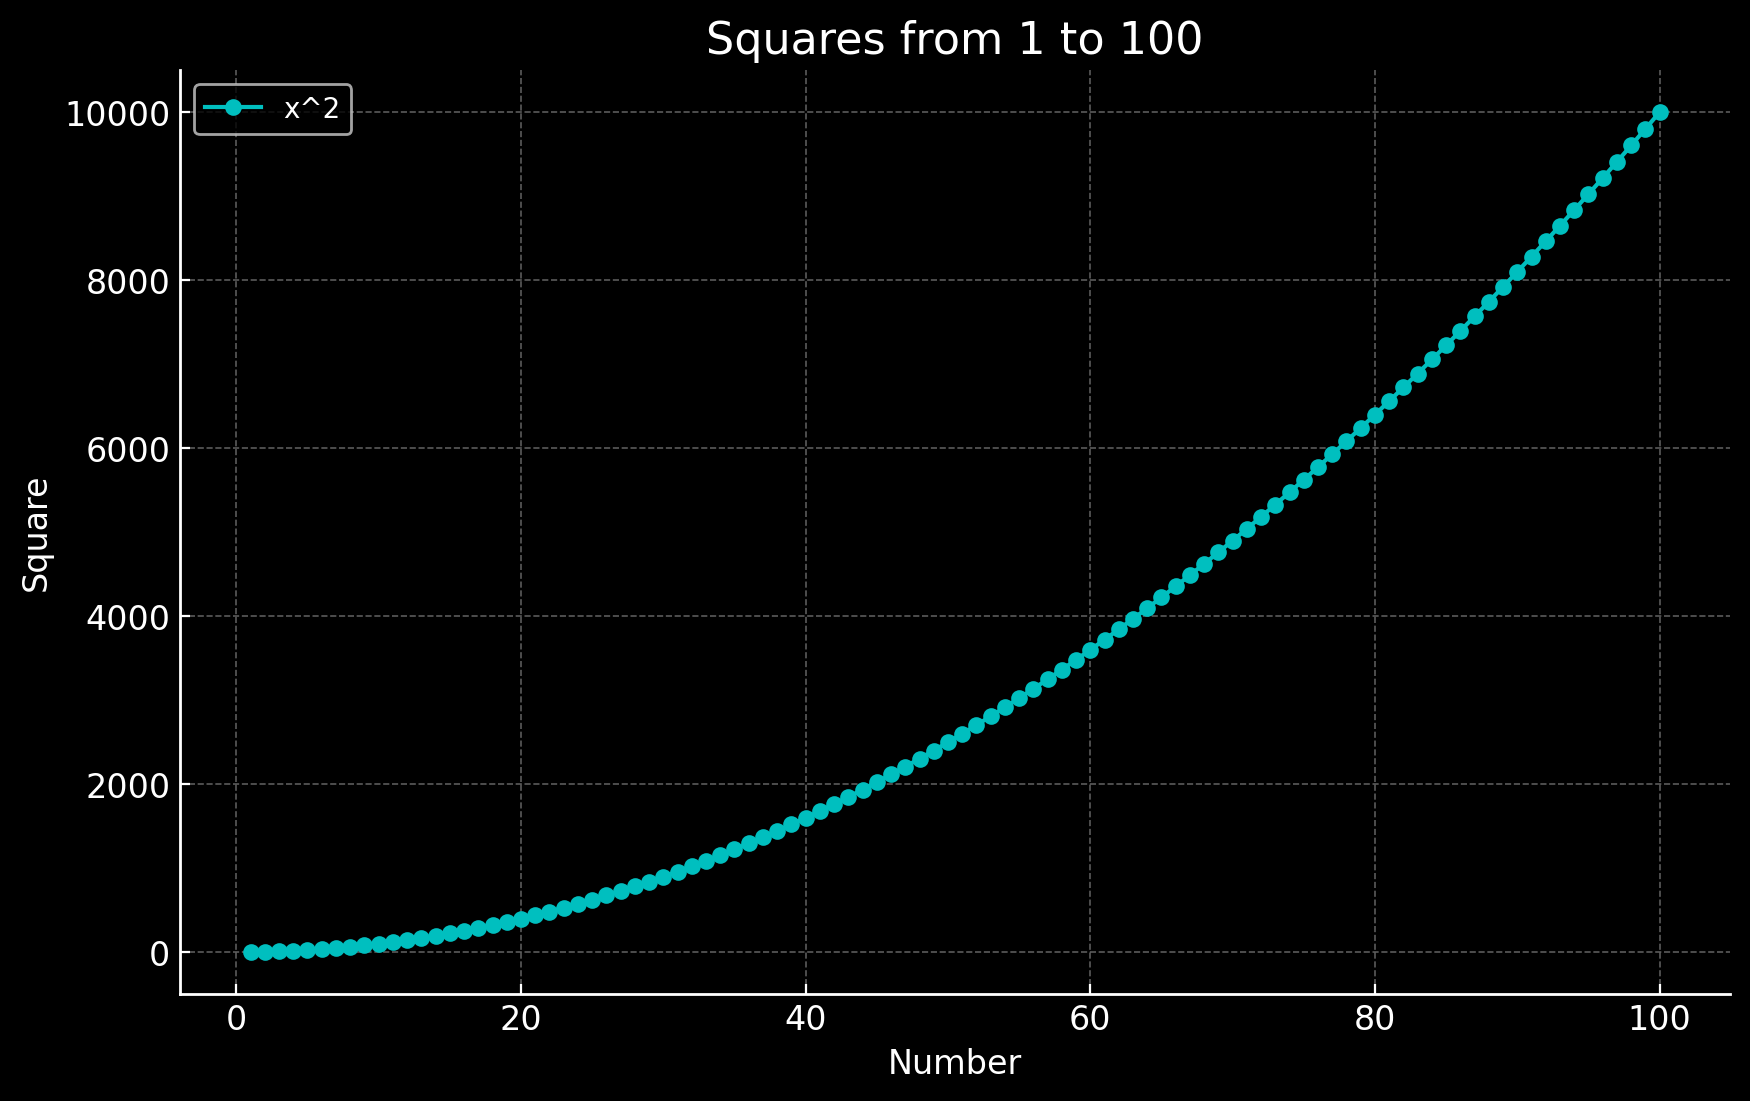

In [129]:
from PIL import Image
image = Image.open("/tmp/squareoutput.png")
image.show()

In [120]:
r2 = client.beta.threads.runs.create(thread_id=thread.id, assistant_id=assistant.id)

In [127]:
messages = client.beta.threads.messages.list(thread_id=thread.id)
print(messages.model_dump_json(indent=2))

{
  "data": [
    {
      "id": "msg_UZJjWBlp6nsZ0n8k8oziqv7E",
      "assistant_id": "asst_wOc53XXiUpzAaoKpF5rNWu39",
      "attachments": [
        {
          "file_id": "assistant-XIPfTnjnHluEv2etrBtLLyKf",
          "tools": [
            {
              "type": "code_interpreter"
            }
          ]
        }
      ],
      "completed_at": null,
      "content": [
        {
          "image_file": {
            "file_id": "assistant-v3w9eOdLBxLZrkO4pBMbQtVx",
            "detail": null
          },
          "type": "image_file"
        },
        {
          "text": {
            "annotations": [
              {
                "end_index": 360,
                "file_path": {
                  "file_id": "assistant-XIPfTnjnHluEv2etrBtLLyKf"
                },
                "start_index": 321,
                "text": "sandbox:/mnt/data/squares_dark_mode.png",
                "type": "file_path"
              }
            ],
            "value": "Here is the graph chart d